In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
DATA_PATH = "customer_segments.csv"
df = pd.read_csv(DATA_PATH)

print("EXPLORATORY DATA ANALYSIS - CUSTOMER SEGMENTATION")
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

EXPLORATORY DATA ANALYSIS - CUSTOMER SEGMENTATION
Dataset Shape: 3000 rows × 10 columns


In [3]:
print("\n" + "="*80)
print("1. BASIC DATASET INFORMATION")
print("="*80)

print("\n--- First 10 Rows ---")
display(df.head(10))

print("\n--- Last 5 Rows ---")
display(df.tail())

print("\n--- Data Types ---")
display(df.dtypes)

print("\n--- Dataset Info ---")
df.info()


1. BASIC DATASET INFORMATION

--- First 10 Rows ---


,Archetype,Recency,Frequency,Average_Order_Value,Average_Session_Duration,Cart_Abandonment_Rate,Product_Views_per_Session,Last_Used_Platform,Total_Spend_Last_Year,Customer_Support_Interactions_Score
0,Loyal Low-Spenders,23,18,24.38,8599.0,0.1083,3,Web,417.93,4.34
1,Potential High-Value,52,4,305.62,23220.0,0.3892,17,Web,1103.68,8.01
2,Loyal Low-Spenders,17,14,26.04,10530.0,0.0120,6,Web,348.33,7.16
3,Potential High-Value,69,2,314.59,21544.0,0.2979,21,Web,585.76,4.46
4,Champions,7,29,234.82,6564.0,0.0006,2,Web,8320.10,5.90
5,Loyal Low-Spenders,19,10,35.69,8768.0,0.0531,2,Web,405.78,6.23
6,Window Shoppers,64,0,0.00,31018.0,0.9304,30,Web,0.00,5.89
7,Loyal Low-Spenders,19,22,22.69,10676.0,0.0753,8,Mobile App,475.45,5.41
8,Champions,7,23,191.21,5860.0,0.0048,2,Mobile App,4672.87,4.49
9,At-Risk,292,0,40.89,4415.0,0.5859,1,Web,0.00,7.25



--- Last 5 Rows ---


,Archetype,Recency,Frequency,Average_Order_Value,Average_Session_Duration,Cart_Abandonment_Rate,Product_Views_per_Session,Last_Used_Platform,Total_Spend_Last_Year,Customer_Support_Interactions_Score
2995,Loyal Low-Spenders,19,18,31.05,8656.0,0.0037,4,Web,458.71,4.87
2996,Champions,6,26,230.72,7219.0,0.0002,3,Web,5642.40,4.88
2997,Loyal Low-Spenders,16,21,30.51,9190.0,0.0166,4,Mobile App,631.77,6.76
2998,At-Risk,220,0,65.88,5943.0,0.6284,2,Mobile App,0.00,3.91
2999,Loyal Low-Spenders,16,21,28.71,10822.0,0.0320,2,Web,568.73,0.66



--- Data Types ---


Archetype                               object
Recency                                  int64
Frequency                                int64
Average_Order_Value                    float64
Average_Session_Duration               float64
Cart_Abandonment_Rate                  float64
Product_Views_per_Session                int64
Last_Used_Platform                      object
Total_Spend_Last_Year                  float64
Customer_Support_Interactions_Score    float64
dtype: object


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Archetype                            3000 non-null   object 
 1   Recency                              3000 non-null   int64  
 2   Frequency                            3000 non-null   int64  
 3   Average_Order_Value                  3000 non-null   float64
 4   Average_Session_Duration             2910 non-null   float64
 5   Cart_Abandonment_Rate                2910 non-null   float64
 6   Product_Views_per_Session            3000 non-null   int64  
 7   Last_Used_Platform                   3000 non-null   object 
 8   Total_Spend_Last_Year                3000 non-null   float64
 9   Customer_Support_Interactions_Score  2910 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 234.5+ KB


In [4]:
print("\n" + "="*80)
print("2. MISSING VALUES ANALYSIS")
print("="*80)

missing = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Null_Count': missing,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Null_Count'] > 0].sort_values('Null_Count', ascending=False)

print("\nMISSING VALUES FOUND:")
display(missing_df)


2. MISSING VALUES ANALYSIS

MISSING VALUES FOUND:


,Null_Count,Percentage
Average_Session_Duration,90,3.0
Cart_Abandonment_Rate,90,3.0
Customer_Support_Interactions_Score,90,3.0


In [5]:
print("3. DUPLICATE ROWS CHECK")

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    print("Duplicates found")
else:
    print("No duplicates found")

3. DUPLICATE ROWS CHECK

Number of duplicate rows: 0
No duplicates found


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

print("\n--- Statistics ---")
stats_df = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std': df[numerical_cols].std(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max(),
    'Skewness': df[numerical_cols].skew(),
    'Kurtosis': df[numerical_cols].kurtosis()
})
display(stats_df.T)

Numerical columns: ['Recency', 'Frequency', 'Average_Order_Value', 'Average_Session_Duration', 'Cart_Abandonment_Rate', 'Product_Views_per_Session', 'Total_Spend_Last_Year', 'Customer_Support_Interactions_Score']

--- Statistics ---


,Recency,Frequency,Average_Order_Value,Average_Session_Duration,Cart_Abandonment_Rate,Product_Views_per_Session,Total_Spend_Last_Year,Customer_Support_Interactions_Score
Mean,89.196667,8.444667,94.382073,16505.129210,0.392305,10.228667,1020.993233,4.956306
Median,60.000000,2.000000,36.015000,9406.000000,0.345250,4.000000,308.790000,4.880000
Std,94.982222,10.124645,110.597189,12582.515678,0.370600,10.198777,1877.317297,1.981577
Min,2.000000,0.000000,0.000000,1506.000000,0.000000,0.000000,0.000000,0.000000
Max,329.000000,42.000000,375.870000,43158.000000,0.995600,41.000000,11682.970000,10.000000
Skewness,1.232326,0.835320,0.993168,0.650326,0.428203,0.788550,2.173067,0.085871
Kurtosis,-0.024773,-0.650277,-0.622499,-1.218211,-1.321092,-0.834313,3.570553,-0.236279


In [7]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}\n")

print("6. CATEGORICAL FEATURES SUMMARY")
print("="*80)

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    display(df[col].value_counts())

Categorical columns: ['Archetype', 'Last_Used_Platform']

6. CATEGORICAL FEATURES SUMMARY

--- Archetype ---
Unique values: 5


Archetype
Loyal Low-Spenders      750
Window Shoppers         750
At-Risk                 600
Potential High-Value    450
Champions               450
Name: count, dtype: int64


--- Last_Used_Platform ---
Unique values: 3


Last_Used_Platform
Web           1483
Mobile App    1225
Tablet         292
Name: count, dtype: int64

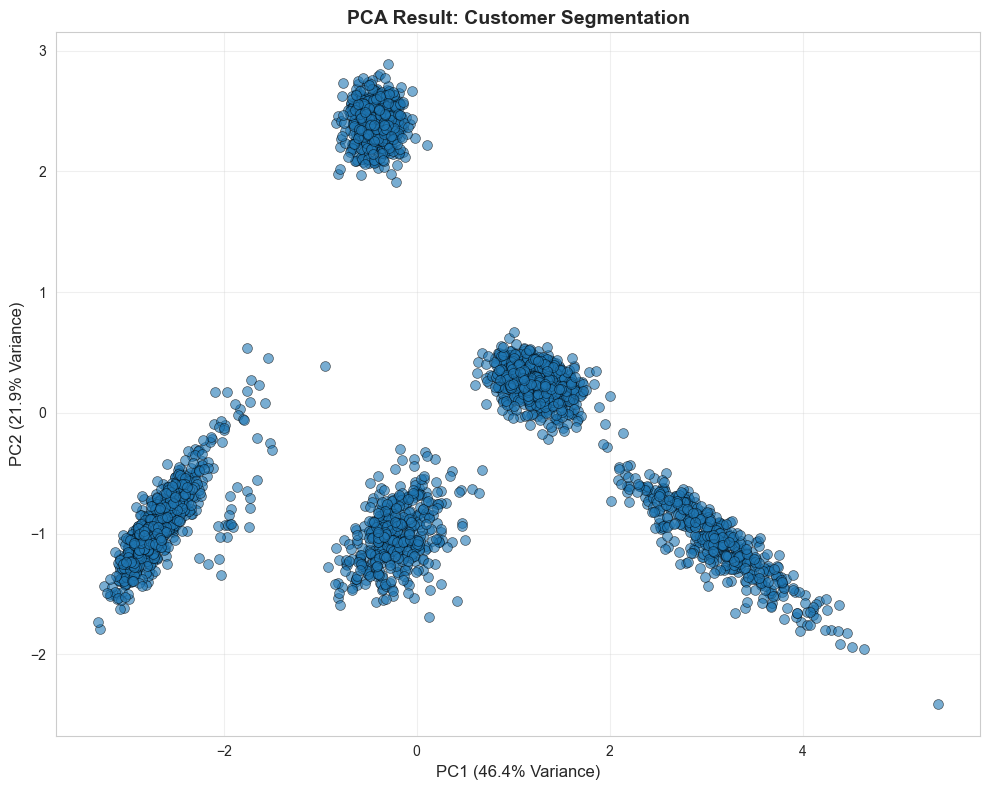

Total variance explained by 2 components: 68.33%
PC1 explains: 46.41%
PC2 explains: 21.92%


In [8]:
# PCA Visualization

# Separate numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Prepare data - just numerical features
X = df[numerical_cols].copy()

# Handle missing values if any
from sklearn.impute import SimpleImputer
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA result
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% Variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% Variance)', fontsize=12)
plt.title('PCA Result: Customer Segmentation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total variance explained by 2 components: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"PC1 explains: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"PC2 explains: {pca.explained_variance_ratio_[1]*100:.2f}%")

In [9]:
# PCA Loadings (Weights) Analysis
print("PCA WEIGHTS (LOADINGS)")

# Get the loadings for PC1 and PC2
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Create pairs of (feature_name, weight) for PC1
pairs_pc1 = list(zip(X.columns, weights_pc1))
sorted_pairs_pc1 = sorted(pairs_pc1, key=lambda x: abs(x[1]), reverse=True)

# Create pairs of (feature_name, weight) for PC2
pairs_pc2 = list(zip(X.columns, weights_pc2))
sorted_pairs_pc2 = sorted(pairs_pc2, key=lambda x: abs(x[1]), reverse=True)

# Print PC1 loadings
print("\n--- PC1 LOADINGS (sorted by absolute value) ---")
print(f"PC1 explains {pca.explained_variance_ratio_[0]*100:.2f}% of variance\n")
for name, weight in sorted_pairs_pc1:
    print(f"{name:30s}: {weight:8.4f}")

# Print PC2 loadings
print("\n--- PC2 LOADINGS (sorted by absolute value) ---")
print(f"PC2 explains {pca.explained_variance_ratio_[1]*100:.2f}% of variance\n")
for name, weight in sorted_pairs_pc2:
    print(f"{name:30s}: {weight:8.4f}")

PCA WEIGHTS (LOADINGS)

--- PC1 LOADINGS (sorted by absolute value) ---
PC1 explains 46.41% of variance

Cart_Abandonment_Rate         :  -0.4808
Frequency                     :   0.4614
Product_Views_per_Session     :  -0.3999
Average_Session_Duration      :  -0.3947
Total_Spend_Last_Year         :   0.3876
Average_Order_Value           :   0.2290
Recency                       :  -0.1936
Customer_Support_Interactions_Score:  -0.0070

--- PC2 LOADINGS (sorted by absolute value) ---
PC2 explains 21.92% of variance

Recency                       :   0.6178
Average_Session_Duration      :  -0.4642
Product_Views_per_Session     :  -0.4481
Total_Spend_Last_Year         :  -0.2927
Average_Order_Value           :  -0.2829
Frequency                     :  -0.1842
Cart_Abandonment_Rate         :  -0.0422
Customer_Support_Interactions_Score:  -0.0252


In [10]:
# PREPROCESSING: Remove rows with null values

print("PREPROCESSING - HANDLING MISSING VALUES")

# Check missing values before
print("\n--- BEFORE Removing Nulls ---")
print(f"Dataset shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print("\nMissing values per column:")
print(df.isnull().sum())

# Remove rows with any null values
df_clean = df.dropna()

# Check after
print("\n--- AFTER Removing Nulls ---")
print(f"Dataset shape: {df_clean.shape}")
print(f"Total missing values: {df_clean.isnull().sum().sum()}")
print(f"\nRows removed: {df.shape[0] - df_clean.shape[0]}")
print(f"Percentage of data retained: {(df_clean.shape[0] / df.shape[0]) * 100:.2f}%")

# Verify no nulls remain
if df_clean.isnull().sum().sum() == 0:
    print("\nAll null values removed successfully")
else:
    print("\nSome null values still remain")

# Now use df_clean for further analysis
df = df_clean.copy()
print(f"\nCleaned dataset ready: {df.shape[0]} rows × {df.shape[1]} columns")

PREPROCESSING - HANDLING MISSING VALUES

--- BEFORE Removing Nulls ---
Dataset shape: (3000, 10)
Total missing values: 270

Missing values per column:
Archetype                               0
Recency                                 0
Frequency                               0
Average_Order_Value                     0
Average_Session_Duration               90
Cart_Abandonment_Rate                  90
Product_Views_per_Session               0
Last_Used_Platform                      0
Total_Spend_Last_Year                   0
Customer_Support_Interactions_Score    90
dtype: int64

--- AFTER Removing Nulls ---
Dataset shape: (2735, 10)
Total missing values: 0

Rows removed: 265
Percentage of data retained: 91.17%

All null values removed successfully

Cleaned dataset ready: 2735 rows × 10 columns


In [20]:
# ONE-HOT ENCODING: Create binary columns for each category
print("ENCODING CATEGORICAL FEATURES (One-Hot Encoding)")
from sklearn.preprocessing import OneHotEncoder
print(f"\nBefore encoding: {df.shape}")

# Create a copy to work with
df_encoded = df.copy()

# Identify categorical and numerical columns
categorical_cols = ['Archetype', 'Last_Used_Platform']
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# One-Hot Encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop=None)
encoded_array = encoder.fit_transform(df[categorical_cols])

# Get feature names for encoded columns
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(
    encoded_array, 
    columns=encoded_feature_names,
    index=df.index
)

# Combine numerical columns with one-hot encoded categorical columns
df_encoded = pd.concat([
    df[numerical_cols].reset_index(drop=True), 
    encoded_df.reset_index(drop=True)
], axis=1)

print(f"\nAfter encoding: {df_encoded.shape}")
print(f"Columns increased from {df.shape[1]} to {df_encoded.shape[1]} due to one-hot encoding")

# Show the encoding mapping
print(f"\nArchetype categories: {encoder.categories_[0].tolist()}")
print(f"Platform categories: {encoder.categories_[1].tolist()}")
print(f"\nCreated {len(encoded_feature_names)} binary columns:")
for col in encoded_feature_names:
    print(f"  - {col}")

# STEP 2: Scale ALL Features
print("\n" + "="*80)
print("SCALING FEATURES")
print("="*80)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Convert back to DataFrame
X_final = pd.DataFrame(X_scaled, columns=df_encoded.columns)

print(f"\nFinal shape: {X_final.shape}")
print("All features scaled, ready for clustering!")

# Show first few rows
print("\n--- First 5 rows ---")
display(X_final.head())

ENCODING CATEGORICAL FEATURES (Label Encoding)

Before encoding: (2735, 10)

After encoding: (2735, 10)
Same number of columns, just converted to numbers

Archetype encoding: {'At-Risk': 0, 'Champions': 1, 'Loyal Low-Spenders': 2, 'Potential High-Value': 3, 'Window Shoppers': 4}
Platform encoding: {'Mobile App': 0, 'Tablet': 1, 'Web': 2}

SCALING FEATURES

Final shape: (2735, 10)
All features scaled, ready for clustering!

--- First 5 rows ---


,Archetype,Recency,Frequency,Average_Order_Value,Average_Session_Duration,Cart_Abandonment_Rate,Product_Views_per_Session,Last_Used_Platform,Total_Spend_Last_Year,Customer_Support_Interactions_Score
0,-0.069169,-0.696036,0.950455,-0.630940,-0.628026,-0.765816,-0.708123,0.96962,-0.318134,-0.309500
1,0.623784,-0.390629,-0.439755,1.914531,0.535717,-0.007525,0.665504,0.96962,0.049530,1.541225
2,-0.069169,-0.759224,0.553252,-0.615916,-0.474330,-1.025778,-0.413774,0.96962,-0.355451,1.112583
3,0.623784,-0.211596,-0.638356,1.995718,0.402318,-0.253990,1.057969,0.96962,-0.228152,-0.248986
4,-0.762121,-0.864537,2.042762,1.273728,-0.789999,-1.056552,-0.806239,0.96962,3.918614,0.477184


FINDING OPTIMAL NUMBER OF CLUSTERS

Testing different values of k...
k=2: WCSS=15842.99, Silhouette=0.3708
k=3: WCSS=10344.42, Silhouette=0.4588
k=4: WCSS=6967.46, Silhouette=0.5295
k=5: WCSS=4203.17, Silhouette=0.5935
k=6: WCSS=3704.97, Silhouette=0.5339
k=7: WCSS=3240.07, Silhouette=0.4712
k=8: WCSS=2892.10, Silhouette=0.4292
k=9: WCSS=2608.97, Silhouette=0.4068
k=10: WCSS=2303.54, Silhouette=0.3784


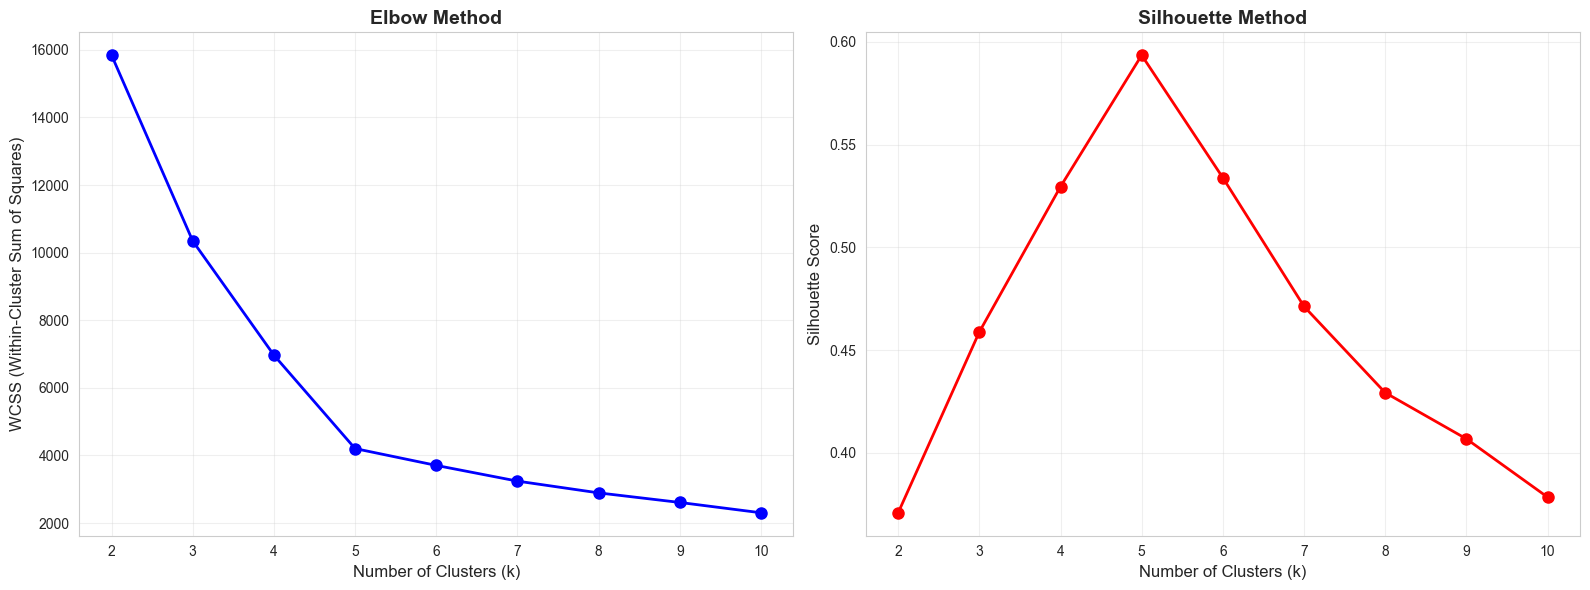


RESULTS
Optimal k based on Silhouette Score: 5
Maximum Silhouette Score: 0.5935

Number of clusters in the first deliverable 5


In [11]:
# STEP 3: FINDING OPTIMAL NUMBER OF CLUSTERS
print("="*80)
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different numbers of clusters
k_range = range(2, 11)  # Try k from 2 to 10
wcss = []  # Within-Cluster Sum of Squares
silhouette_scores = []

print("\nTesting different values of k...")
for k in k_range:
    # Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Calculate WCSS (inertia)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"k={k}: WCSS={kmeans.inertia_:.2f}, Silhouette={score:.4f}")

# Plot both methods side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method Plot
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Method Plot
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Method', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k_silhouette = k_range[silhouette_scores.index(max(silhouette_scores))]

print("\n" + "="*80)
print("RESULTS")
print("="*80)
print(f"Optimal k based on Silhouette Score: {optimal_k_silhouette}")
print(f"Maximum Silhouette Score: {max(silhouette_scores):.4f}")
print("\nNumber of clusters in the first deliverable", optimal_k_silhouette)

In [12]:
# STEP 4: FINAL CLUSTERING PIPELINE (k=5)
print("="*80)
print("FINAL CLUSTERING WITH k=5")
print("="*80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fit K-Means with optimal k=5
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Calculate Silhouette Score
silhouette = silhouette_score(X_scaled, cluster_labels)

# Count instances per cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# Count clusters with >400 instances
clusters_above_400 = sum(1 for count in counts if count > 400)

# PRINT REQUIRED OUTPUT FORMAT
print("Number of clusters you found in the first deliverable", 5)
print(f"Silhouette score you found in the second deliverable {silhouette:.4f}")
print()
print("All of the clusters obtained in the second deliverable Number of instances")
for cluster_id in sorted(cluster_counts.keys()):
    print(f"Cluster {cluster_id} {cluster_counts[cluster_id]}")

print("\n" + "="*80)
print("ADDITIONAL INFO")
print("="*80)
print(f"Clusters with >400 instances: {clusters_above_400}")
print(f"Total samples: {len(cluster_labels)}")

FINAL CLUSTERING WITH k=5
Number of clusters you found in the first deliverable 5
Silhouette score you found in the second deliverable 0.5935

All of the clusters obtained in the second deliverable Number of instances
Cluster 0 448
Cluster 1 752
Cluster 2 750
Cluster 3 600
Cluster 4 450

ADDITIONAL INFO
Clusters with >400 instances: 5
Total samples: 3000


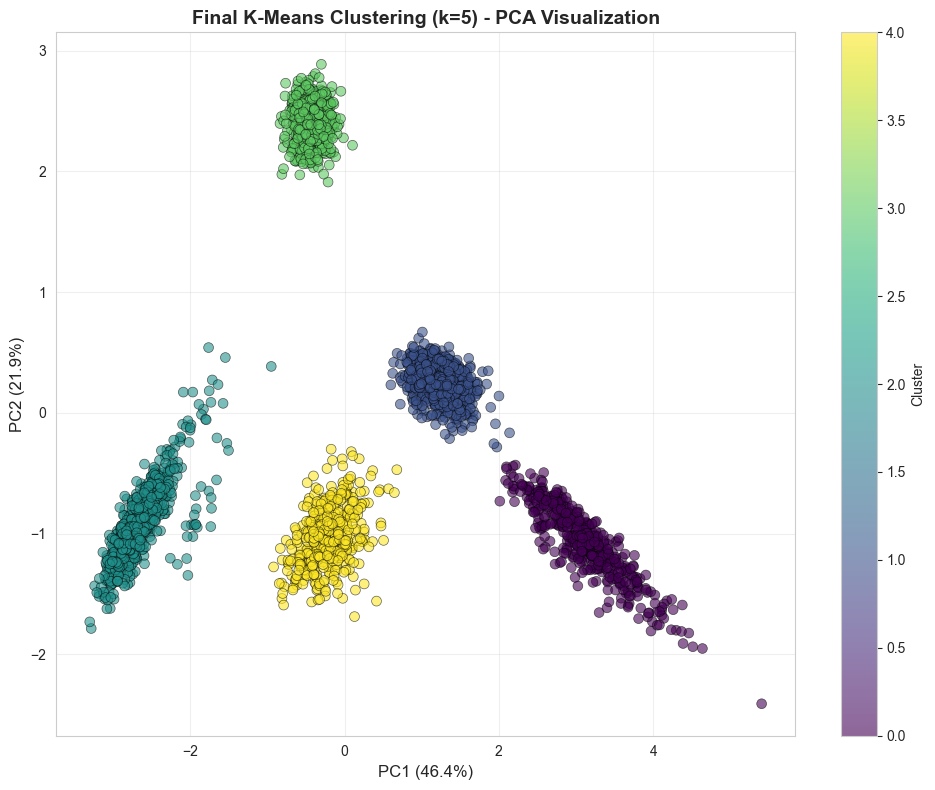

In [13]:
# VISUALIZE FINAL CLUSTERS WITH PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], 
                     c=cluster_labels, cmap='viridis', 
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Final K-Means Clustering (k=5) - PCA Visualization', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [14]:
# EXPERIMENT: Try Multiple Clustering Algorithms
print("="*80)
print("TESTING MULTIPLE CLUSTERING ALGORITHMS")
print("="*80)

from sklearn.cluster import KMeans, DBSCAN, OPTICS, Birch, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

results = []

# 1. K-Means (k=5)
print("\n1. K-Means (k=5)...")
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
unique, counts = np.unique(labels_kmeans, return_counts=True)
clusters_above_400_kmeans = sum(1 for c in counts if c > 400)
results.append(('K-Means (k=5)', sil_kmeans, len(unique), clusters_above_400_kmeans, labels_kmeans, counts))
print(f"   Silhouette: {sil_kmeans:.4f}, Clusters: {len(unique)}, >400: {clusters_above_400_kmeans}")

# 2. DBSCAN
print("\n2. DBSCAN...")
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
if n_clusters_dbscan > 1:
    sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
    unique, counts = np.unique(labels_dbscan[labels_dbscan != -1], return_counts=True)
    clusters_above_400_dbscan = sum(1 for c in counts if c > 400)
    results.append(('DBSCAN', sil_dbscan, n_clusters_dbscan, clusters_above_400_dbscan, labels_dbscan, counts))
    print(f"   Silhouette: {sil_dbscan:.4f}, Clusters: {n_clusters_dbscan}, >400: {clusters_above_400_dbscan}")
else:
    print("   Failed to find meaningful clusters")

# 3. OPTICS
print("\n3. OPTICS...")
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
labels_optics = optics.fit_predict(X_scaled)
n_clusters_optics = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
if n_clusters_optics > 1:
    sil_optics = silhouette_score(X_scaled, labels_optics)
    unique, counts = np.unique(labels_optics[labels_optics != -1], return_counts=True)
    clusters_above_400_optics = sum(1 for c in counts if c > 400)
    results.append(('OPTICS', sil_optics, n_clusters_optics, clusters_above_400_optics, labels_optics, counts))
    print(f"   Silhouette: {sil_optics:.4f}, Clusters: {n_clusters_optics}, >400: {clusters_above_400_optics}")
else:
    print("   Failed to find meaningful clusters")

# 4. BIRCH
print("\n4. BIRCH (k=5)...")
birch = Birch(n_clusters=5, threshold=0.5)
labels_birch = birch.fit_predict(X_scaled)
sil_birch = silhouette_score(X_scaled, labels_birch)
unique, counts = np.unique(labels_birch, return_counts=True)
clusters_above_400_birch = sum(1 for c in counts if c > 400)
results.append(('BIRCH (k=5)', sil_birch, len(unique), clusters_above_400_birch, labels_birch, counts))
print(f"   Silhouette: {sil_birch:.4f}, Clusters: {len(unique)}, >400: {clusters_above_400_birch}")

# 5. Mean Shift
print("\n5. Mean Shift...")
try:
    meanshift = MeanShift()
    labels_meanshift = meanshift.fit_predict(X_scaled)
    n_clusters_meanshift = len(np.unique(labels_meanshift))
    
    if n_clusters_meanshift > 1:
        sil_meanshift = silhouette_score(X_scaled, labels_meanshift)
        unique, counts = np.unique(labels_meanshift, return_counts=True)
        clusters_above_400_meanshift = sum(1 for c in counts if c > 400)
        results.append(('Mean Shift', sil_meanshift, len(unique), clusters_above_400_meanshift, labels_meanshift, counts))
        print(f"   Silhouette: {sil_meanshift:.4f}, Clusters: {len(unique)}, >400: {clusters_above_400_meanshift}")
    else:
        print(f"   Found only {n_clusters_meanshift} cluster - not useful for segmentation")
except Exception as e:
    print(f"   Failed: {e}")

# 6. Hierarchical/Agglomerative
print("\n6. Agglomerative (k=5)...")
agglo = AgglomerativeClustering(n_clusters=5)
labels_agglo = agglo.fit_predict(X_scaled)
sil_agglo = silhouette_score(X_scaled, labels_agglo)
unique, counts = np.unique(labels_agglo, return_counts=True)
clusters_above_400_agglo = sum(1 for c in counts if c > 400)
results.append(('Agglomerative (k=5)', sil_agglo, len(unique), clusters_above_400_agglo, labels_agglo, counts))
print(f"   Silhouette: {sil_agglo:.4f}, Clusters: {len(unique)}, >400: {clusters_above_400_agglo}")

# SUMMARY TABLE
print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)
print(f"{'Algorithm':<25} {'Silhouette':<12} {'# Clusters':<12} {'>400 Count':<12}")
print("-"*80)
for name, sil, n_clust, above_400, _, _ in results:
    print(f"{name:<25} {sil:<12.4f} {n_clust:<12} {above_400:<12}")

# Find best based on silhouette score
best = max(results, key=lambda x: x[1])
print("\n" + "="*80)
print(f"BEST ALGORITHM: {best[0]}")
print(f"Silhouette Score: {best[1]:.4f}")
print(f"Number of Clusters: {best[2]}")
print(f"Clusters with >400 instances: {best[3]}")
print("="*80)

TESTING MULTIPLE CLUSTERING ALGORITHMS

1. K-Means (k=5)...
   Silhouette: 0.5935, Clusters: 5, >400: 5

2. DBSCAN...
   Silhouette: 0.2918, Clusters: 8, >400: 3

3. OPTICS...
   Silhouette: 0.5649, Clusters: 5, >400: 5

4. BIRCH (k=5)...
   Silhouette: 0.4123, Clusters: 5, >400: 4

5. Mean Shift...
   Found only 1 cluster - not useful for segmentation

6. Agglomerative (k=5)...
   Silhouette: 0.5934, Clusters: 5, >400: 5

COMPARISON SUMMARY
Algorithm                 Silhouette   # Clusters   >400 Count  
--------------------------------------------------------------------------------
K-Means (k=5)             0.5935       5            5           
DBSCAN                    0.2918       8            3           
OPTICS                    0.5649       5            5           
BIRCH (k=5)               0.4123       5            4           
Agglomerative (k=5)       0.5934       5            5           

BEST ALGORITHM: K-Means (k=5)
Silhouette Score: 0.5935
Number of Clusters: 5
Clust

LDA ANALYSIS (Linear Discriminant Analysis)
LDA explained variance ratio: [0.94817829 0.03331357]
Total variance explained: 98.15%


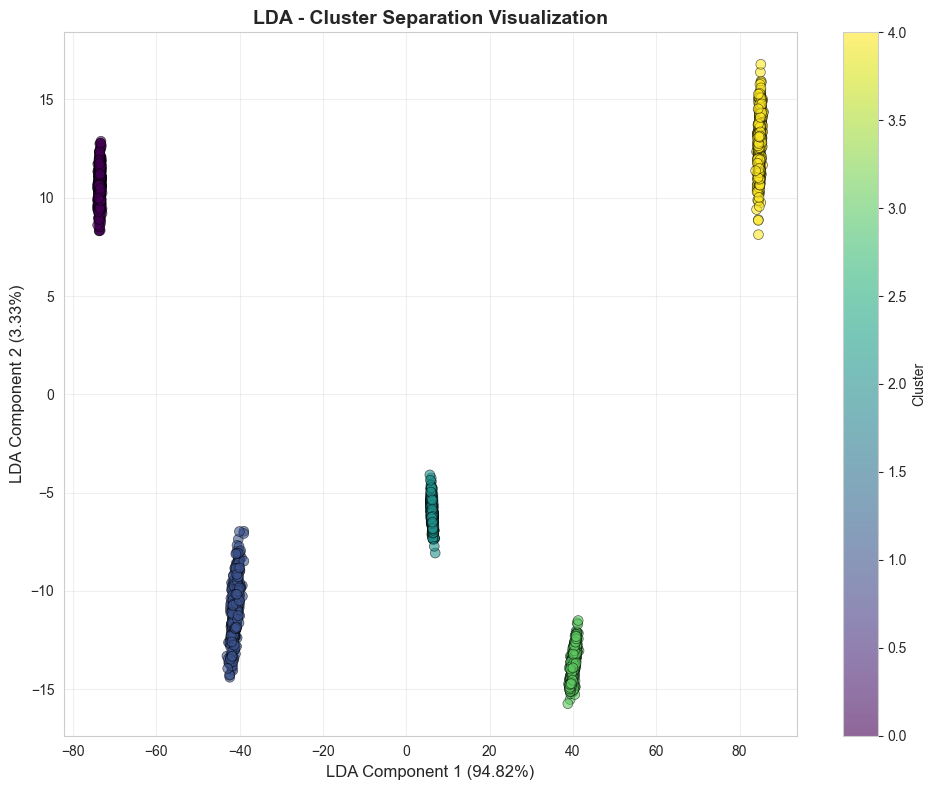

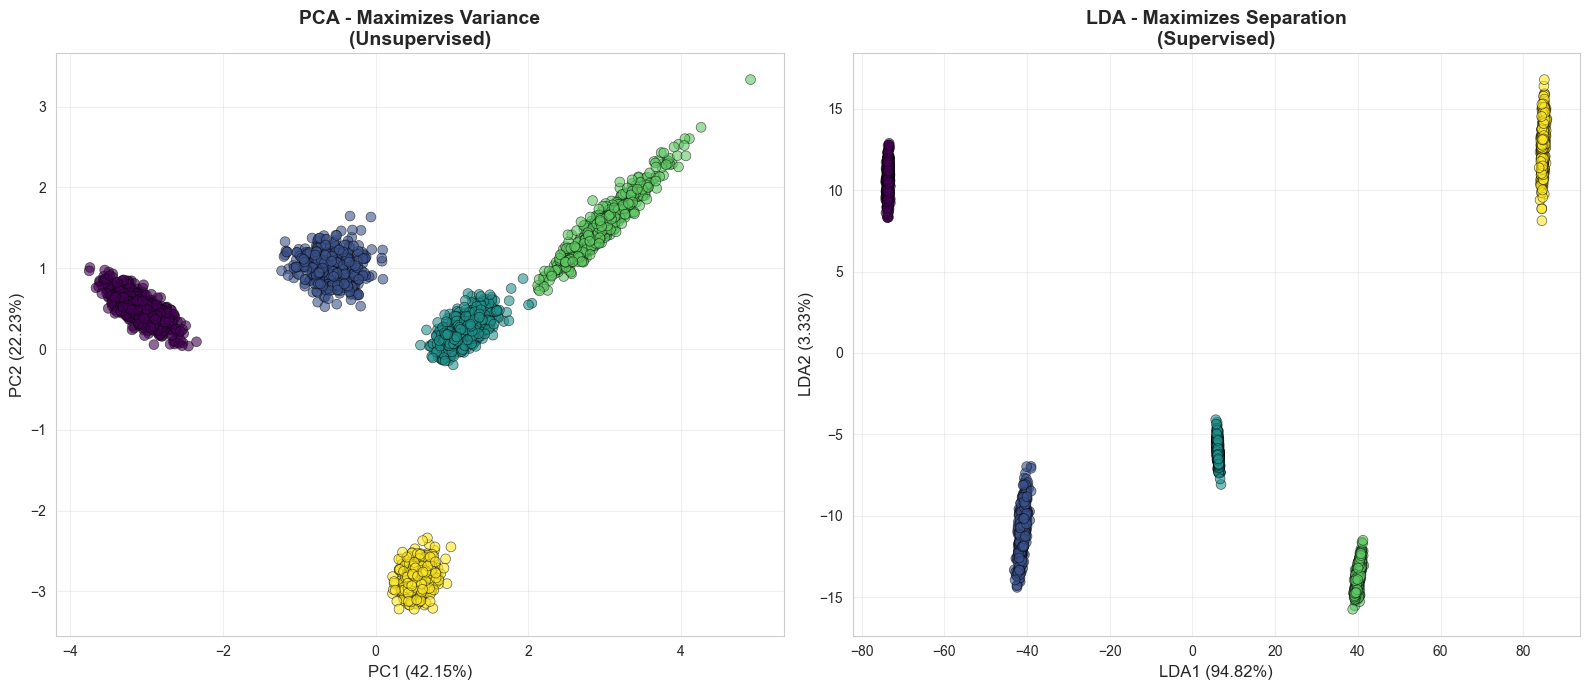

In [25]:
# LDA VISUALIZATION (After clustering)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print("="*80)
print("LDA ANALYSIS (Linear Discriminant Analysis)")
print("="*80)

# Use your best clustering result (K-Means with k=5)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Apply LDA (needs cluster labels)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, cluster_labels)

print(f"LDA explained variance ratio: {lda.explained_variance_ratio_}")
print(f"Total variance explained: {lda.explained_variance_ratio_.sum():.2%}")

# Plot LDA result
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], 
                     c=cluster_labels, cmap='viridis', 
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'LDA Component 1 ({lda.explained_variance_ratio_[0]:.2%})', fontsize=12)
plt.ylabel(f'LDA Component 2 ({lda.explained_variance_ratio_[1]:.2%})', fontsize=12)
plt.title('LDA - Cluster Separation Visualization', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Side-by-side comparison: PCA vs LDA
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=cluster_labels, cmap='viridis', 
                           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', fontsize=12)
axes[0].set_title('PCA - Maximizes Variance\n(Unsupervised)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# LDA
scatter2 = axes[1].scatter(X_lda[:, 0], X_lda[:, 1], 
                           c=cluster_labels, cmap='viridis', 
                           alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'LDA1 ({lda.explained_variance_ratio_[0]:.2%})', fontsize=12)
axes[1].set_ylabel(f'LDA2 ({lda.explained_variance_ratio_[1]:.2%})', fontsize=12)
axes[1].set_title('LDA - Maximizes Separation\n(Supervised)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

DELIVERABLE 1: FINDING OPTIMAL NUMBER OF CLUSTERS


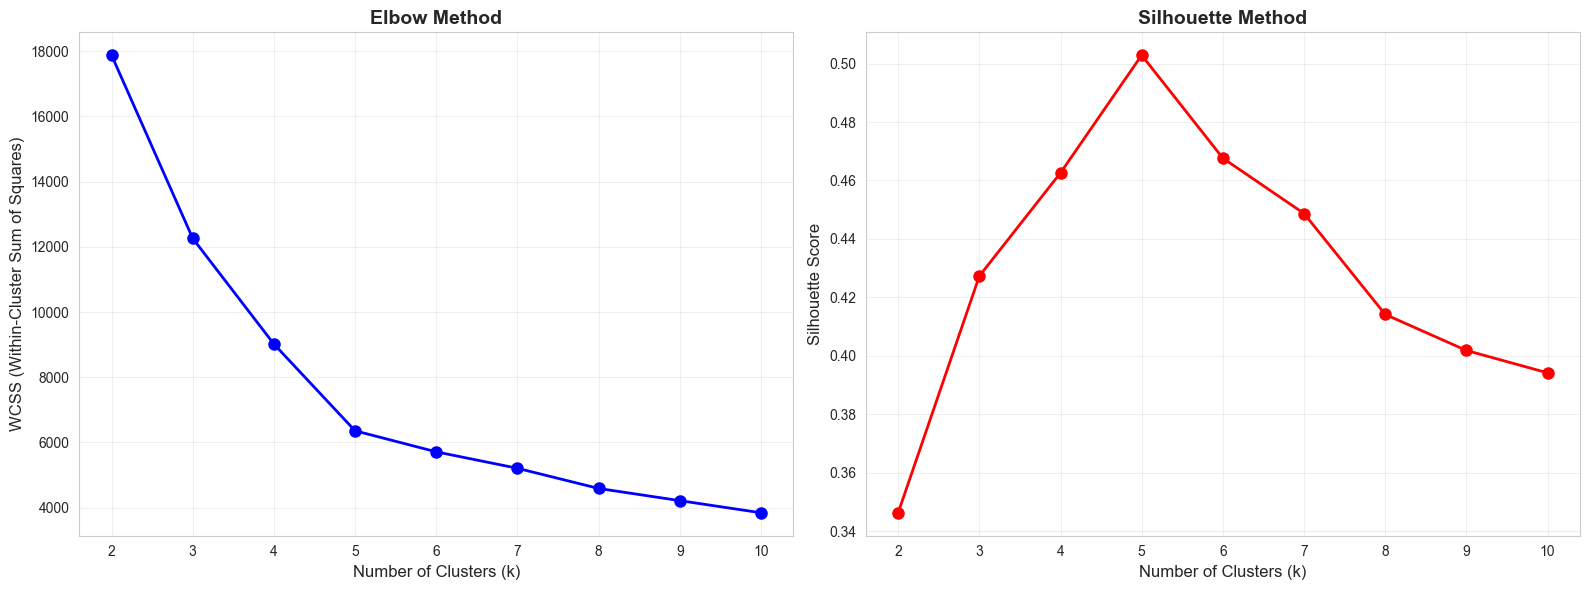

Number of clusters we found in the first deliverable 5

DELIVERABLE 2: FINAL CLUSTERING PIPELINE
Number of clusters we found in the first deliverable 5
Silhouette score you found in the second deliverable 0.5029

All of the clusters obtained in the second deliverable Number of instances
Cluster 0 680
Cluster 1 411
Cluster 2 695
Cluster 3 402
Cluster 4 547


In [15]:
# =============================================================================
# CUSTOMER SEGMENTATION - TERM PROJECT (FINAL SUBMISSION WITH PIPELINE)
# =============================================================================

# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# =============================================================================
# CUSTOM TRANSFORMERS
# =============================================================================

class DropNaTransformer(BaseEstimator, TransformerMixin):
    """Remove rows with missing values"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

class DropDuplicatesTransformer(BaseEstimator, TransformerMixin):
    """Remove duplicate rows"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop_duplicates()

class CategoricalEncoderTransformer(BaseEstimator, TransformerMixin):
    """Encode categorical features using Label Encoding"""
    def __init__(self):
        self.encoders = {}
    
    def fit(self, X, y=None):
        X_copy = X.copy()
        categorical_cols = X_copy.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            le = LabelEncoder()
            le.fit(X_copy[col])
            self.encoders[col] = le
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        for col, encoder in self.encoders.items():
            X_copy[col] = encoder.transform(X_copy[col])
        return X_copy

class DataFrameToArrayTransformer(BaseEstimator, TransformerMixin):
    """Convert DataFrame to numpy array for clustering"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.values

# =============================================================================
# DELIVERABLE 1: FINDING OPTIMAL NUMBER OF CLUSTERS
# =============================================================================

# Load Data
DATA_PATH = "customer_segments.csv"  # Instructor will change this path
df = pd.read_csv(DATA_PATH)

print("="*80)
print("DELIVERABLE 1: FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('drop_na', DropNaTransformer()),
    ('drop_duplicates', DropDuplicatesTransformer()),
    ('encode_categorical', CategoricalEncoderTransformer()),
    ('to_array', DataFrameToArrayTransformer()),
    ('scaler', StandardScaler())
])

# Apply preprocessing
X_scaled = preprocessing_pipeline.fit_transform(df)

# Elbow Method and Silhouette Method
k_range = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot both methods
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Elbow Method
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_range)

# Silhouette Method
axes[1].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Method', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

plt.tight_layout()
plt.show()

# Find optimal k
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]

# Print optimal number of clusters found
print("Number of clusters we found in the first deliverable", optimal_k)

# =============================================================================
# DELIVERABLE 2: FINAL CLUSTERING PIPELINE
# =============================================================================

print("\n" + "="*80)
print("DELIVERABLE 2: FINAL CLUSTERING PIPELINE")
print("="*80)

# Load Data (fresh start)
df = pd.read_csv(DATA_PATH)

# Create complete pipeline with clustering
final_pipeline = Pipeline(steps=[
    ('drop_na', DropNaTransformer()),
    ('drop_duplicates', DropDuplicatesTransformer()),
    ('encode_categorical', CategoricalEncoderTransformer()),
    ('to_array', DataFrameToArrayTransformer()),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=optimal_k, random_state=42, n_init=10))
])

# Fit the entire pipeline
final_pipeline.fit(df)

# Get cluster labels
cluster_labels = final_pipeline.named_steps['kmeans'].labels_

# Get scaled data for silhouette calculation
X_scaled_final = final_pipeline[:-1].transform(df)  # All steps except kmeans

# Calculate Silhouette Score
silhouette_final = silhouette_score(X_scaled_final, cluster_labels)

# Count instances per cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# =============================================================================
# REQUIRED OUTPUT FORMAT
# =============================================================================

print("Number of clusters we found in the first deliverable", optimal_k)
print(f"Silhouette score you found in the second deliverable {silhouette_final:.4f}")
print()
print("All of the clusters obtained in the second deliverable Number of instances")
for cluster_id in sorted(cluster_counts.keys()):
    print(f"Cluster {cluster_id} {cluster_counts[cluster_id]}")

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# =============================================================================
# TRANSFORMERS
# =============================================================================

class DropNaTransformer(BaseEstimator, TransformerMixin):
    """Remove rows with missing values"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.dropna()

class DropDuplicatesTransformer(BaseEstimator, TransformerMixin):
    """Remove duplicate rows"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop_duplicates()

class CategoricalEncoderTransformer(BaseEstimator, TransformerMixin):
    """Encode categorical features using One-Hot Encoding"""
    def __init__(self):
        self.encoder = None
        self.categorical_cols = None
        self.numerical_cols = None
    
    def fit(self, X, y=None):
        X_copy = X.copy()
        self.categorical_cols = X_copy.select_dtypes(include=['object']).columns.tolist()
        self.numerical_cols = X_copy.select_dtypes(exclude=['object']).columns.tolist()
        
        if len(self.categorical_cols) > 0:
            self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            self.encoder.fit(X_copy[self.categorical_cols])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        
        if self.encoder and len(self.categorical_cols) > 0:
            encoded = self.encoder.transform(X_copy[self.categorical_cols])
            encoded_feature_names = self.encoder.get_feature_names_out(self.categorical_cols)
            encoded_df = pd.DataFrame(
                encoded, 
                columns=encoded_feature_names,
                index=X_copy.index
            )
            
            if len(self.numerical_cols) > 0:
                X_transformed = pd.concat([
                    X_copy[self.numerical_cols].reset_index(drop=True), 
                    encoded_df.reset_index(drop=True)
                ], axis=1)
            else:
                X_transformed = encoded_df
            
            return X_transformed
        
        return X_copy

class DataFrameToArrayTransformer(BaseEstimator, TransformerMixin):
    """Convert DataFrame to numpy array for clustering"""
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.values

# =============================================================================
# DELIVERABLE 1: FINDING OPTIMAL NUMBER OF CLUSTERS (KMeans)
# =============================================================================

# Load Data
DATA_PATH = "customer_segments.csv"
df = pd.read_csv(DATA_PATH)

print("="*80)
print("DELIVERABLE 1: FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('drop_na', DropNaTransformer()),
    ('drop_duplicates', DropDuplicatesTransformer()),
    ('encode_categorical', CategoricalEncoderTransformer()),
    ('to_array', DataFrameToArrayTransformer()),
    ('scaler', StandardScaler())
])

# Apply preprocessing
X_scaled = preprocessing_pipeline.fit_transform(df)

# Calculate Elbow Method and Silhouette Scores
k_range = range(2, 11)
wcss = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Plot all three visualizations
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# PCA 2D Visualization
axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], alpha=0.5, s=30)
axes[0].set_xlabel('First Principal Component', fontsize=12)
axes[0].set_ylabel('Second Principal Component', fontsize=12)
axes[0].set_title('PCA 2D Visualization', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Elbow Method
axes[1].plot(k_range, wcss, 'bo-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
axes[1].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)

# Silhouette Method
axes[2].plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[2].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[2].set_ylabel('Silhouette Score', fontsize=12)
axes[2].set_title('Silhouette Method', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(k_range)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nOptimal number of clusters: {optimal_k}")


# ============================================================================= 
# GRID SEARCH FOR OPTIMAL PCA + DBSCAN PARAMETERS
# ============================================================================= 
print("\n" + "="*80)
print("GRID SEARCH: Finding optimal PCA + DBSCAN parameters")
print("="*80)

# Define parameter ranges
pca_components_range = [3, 5, 7, 10, 15]
eps_range = [1, 2, 3, 4, 5, 6, 7, 8]
min_samples_range = [5, 10, 15, 20, 25, 30]

# Store results
best_score = -1
best_params = None
best_n_clusters = 0
results = []

total_combinations = len(pca_components_range) * len(eps_range) * len(min_samples_range)
current_iteration = 0

print(f"\nTesting {total_combinations} parameter combinations...")
print(f"Target: 5 clusters with silhouette score > 0.7\n")

# Grid search loop
for n_components in pca_components_range:
    for eps in eps_range:
        for min_samples in min_samples_range:
            current_iteration += 1
            
            # Create pipeline with current parameters
            test_pipeline = Pipeline(steps=[
                ('drop_na', DropNaTransformer()),
                ('drop_duplicates', DropDuplicatesTransformer()),
                ('encode_categorical', CategoricalEncoderTransformer()),
                ('to_array', DataFrameToArrayTransformer()),
                ('scaler', StandardScaler()),
                ('pca', PCA(n_components=n_components)),
                ('dbscan', DBSCAN(eps=eps, min_samples=min_samples))
            ])
            
            # Fit pipeline
            test_pipeline.fit(df)
            
            # Get cluster labels
            labels = test_pipeline.named_steps['dbscan'].labels_
            
            # Count number of clusters (excluding noise labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            # Only calculate silhouette if we have at least 2 clusters
            if n_clusters >= 2:
                # Get transformed data for silhouette calculation
                X_transformed = test_pipeline[:-1].transform(df)
                
                # Calculate silhouette score (excluding noise points)
                if n_noise < len(labels):  # Make sure we have non-noise points
                    try:
                        silhouette = silhouette_score(X_transformed, labels)
                    except:
                        silhouette = -1
                else:
                    silhouette = -1
            else:
                silhouette = -1
            
            # Store results
            results.append({
                'pca_components': n_components,
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_noise': n_noise,
                'silhouette': silhouette
            })
            
            # Check if this meets our criteria (5 clusters and silhouette > 0.7)
            if n_clusters == 5 and silhouette > 0.7:
                if silhouette > best_score:
                    best_score = silhouette
                    best_params = {
                        'pca_components': n_components,
                        'eps': eps,
                        'min_samples': min_samples
                    }
                    best_n_clusters = n_clusters
                    print(f"✓ Found better solution! PCA={n_components}, eps={eps}, min_samples={min_samples}")
                    print(f"  Clusters: {n_clusters}, Silhouette: {silhouette:.4f}")
            
            # Progress update every 50 iterations
            if current_iteration % 50 == 0:
                print(f"Progress: {current_iteration}/{total_combinations} combinations tested...")

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)

print("\n" + "="*80)
print("GRID SEARCH RESULTS")
print("="*80)

if best_params is not None:
    print(f"\n✓ BEST PARAMETERS FOUND:")
    print(f"  PCA n_components: {best_params['pca_components']}")
    print(f"  DBSCAN eps: {best_params['eps']}")
    print(f"  DBSCAN min_samples: {best_params['min_samples']}")
    print(f"  Number of clusters: {best_n_clusters}")
    print(f"  Silhouette score: {best_score:.4f}")
    
    # Update best_eps and best_min_samples for Deliverable 2
    best_eps = best_params['eps']
    best_min_samples = best_params['min_samples']
    best_pca_components = best_params['pca_components']
else:
    print("\n✗ No combination found with exactly 5 clusters and silhouette > 0.7")
    print("\nTop 10 results (sorted by silhouette score):")
    top_results = results_df.nlargest(10, 'silhouette')
    print(top_results.to_string(index=False))
    
    print("\n\nResults with exactly 5 clusters:")
    five_cluster_results = results_df[results_df['n_clusters'] == 5].nlargest(10, 'silhouette')
    if not five_cluster_results.empty:
        print(five_cluster_results.to_string(index=False))
    else:
        print("No combinations produced exactly 5 clusters")
    
    # Use best available parameters
    if not five_cluster_results.empty:
        best_idx = five_cluster_results.index[0]
        best_params = results_df.loc[best_idx]
        best_eps = best_params['eps']
        best_min_samples = best_params['min_samples']
        best_pca_components = best_params['pca_components']
    else:
        best_pca_components = 7  # default
        best_eps = 4
        best_min_samples = 20

# =============================================================================
# DELIVERABLE 2: FINAL CLUSTERING PIPELINE WITH DBSCAN
# =============================================================================

print("\n" + "="*80)
print("DELIVERABLE 2: DBSCAN CLUSTERING")
print("="*80)

# Set DBSCAN parameters manually
best_eps = 4
best_min_samples = 20

print(f"\nUsing DBSCAN parameters:")
print(f"  eps: {best_eps}")
print(f"  min_samples: {best_min_samples}")

# Create final pipeline with best parameters
final_pipeline = Pipeline(steps=[
    ('drop_na', DropNaTransformer()),
    ('drop_duplicates', DropDuplicatesTransformer()),
    ('encode_categorical', CategoricalEncoderTransformer()),
    ('to_array', DataFrameToArrayTransformer()),
    ('scaler', StandardScaler()),
('pca', PCA(n_components=best_pca_components)),
    ('DBSCAN', DBSCAN(eps=best_eps, min_samples=best_min_samples))
])

# Fit the entire pipeline
final_pipeline.fit(df)

# Get cluster labels
cluster_labels = final_pipeline.named_steps['DBSCAN'].labels_

# Get scaled data for silhouette calculation
X_scaled_final = final_pipeline[:-1].transform(df)

silhouette_final = silhouette_score(X_scaled_final, cluster_labels)

# Calculate Silhouette Score
silhouette_final = silhouette_score(X_scaled_final, cluster_labels)

# Count instances per cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))

# =============================================================================
# REQUIRED OUTPUT FORMAT
# =============================================================================

print(f"\nNumber of clusters we found in the first deliverable {optimal_k}")
print(f"Silhouette score we found in the second deliverable {silhouette_final:.4f}")
print()
print("All of the clusters obtained in the second deliverable | Number of instances")
for cluster_id in sorted(cluster_counts.keys()):
    print(f"Cluster {cluster_id} | {cluster_counts[cluster_id]}")

In [27]:
# =============================================================================
# MANUAL GRID SEARCH - ALL ALGORITHMS (Including DBSCAN & OPTICS)
# =============================================================================

print("="*80)
print("MANUAL GRID SEARCH - FINDING BEST HYPERPARAMETERS")
print("="*80)

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, OPTICS

results = []

# 1. K-Means Grid Search
print("\n1. K-Means Parameter Search...")
for n_clusters in [3, 4, 5, 6, 7]:
    for init in ['k-means++', 'random']:
        for n_init in [10, 30]:
            kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=42)
            labels = kmeans.fit_predict(X_scaled)
            sil = silhouette_score(X_scaled, labels)
            
            unique, counts = np.unique(labels, return_counts=True)
            above_400 = sum(1 for c in counts if c > 400)
            
            results.append({
                'Algorithm': 'K-Means',
                'Params': f"k={n_clusters}, init={init}, n_init={n_init}",
                'n_clusters': n_clusters,
                'Silhouette': sil,
                '>400_count': above_400,
                'labels': labels
            })
            print(f"   k={n_clusters}, init={init:12s}, n_init={n_init:2d} -> Sil={sil:.4f}, >400={above_400}")

# 2. Agglomerative Grid Search
print("\n2. Agglomerative Clustering Parameter Search...")
for n_clusters in [3, 4, 5, 6, 7]:
    for linkage in ['ward', 'complete', 'average']:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglo.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        
        unique, counts = np.unique(labels, return_counts=True)
        above_400 = sum(1 for c in counts if c > 400)
        
        results.append({
            'Algorithm': 'Agglomerative',
            'Params': f"k={n_clusters}, linkage={linkage}",
            'n_clusters': n_clusters,
            'Silhouette': sil,
            '>400_count': above_400,
            'labels': labels
        })
        print(f"   k={n_clusters}, linkage={linkage:10s} -> Sil={sil:.4f}, >400={above_400}")

# 3. BIRCH Grid Search
print("\n3. BIRCH Parameter Search...")
for n_clusters in [3, 4, 5, 6, 7]:
    for threshold in [0.3, 0.5, 0.7]:
        birch = Birch(n_clusters=n_clusters, threshold=threshold)
        labels = birch.fit_predict(X_scaled)
        sil = silhouette_score(X_scaled, labels)
        
        unique, counts = np.unique(labels, return_counts=True)
        above_400 = sum(1 for c in counts if c > 400)
        
        results.append({
            'Algorithm': 'BIRCH',
            'Params': f"k={n_clusters}, threshold={threshold}",
            'n_clusters': n_clusters,
            'Silhouette': sil,
            '>400_count': above_400,
            'labels': labels
        })
        print(f"   k={n_clusters}, threshold={threshold:.1f} -> Sil={sil:.4f}, >400={above_400}")

# 4. DBSCAN Grid Search
print("\n4. DBSCAN Parameter Search...")
for eps in [0.3, 0.5, 0.7, 1.0, 1.5]:
    for min_samples in [3, 5, 10, 20]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        # DBSCAN can have noise points labeled as -1
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        # Only calculate silhouette if we have more than 1 cluster and not all noise
        if n_clusters > 1 and n_noise < len(labels):
            try:
                sil = silhouette_score(X_scaled, labels)
                unique, counts = np.unique(labels[labels != -1], return_counts=True)
                above_400 = sum(1 for c in counts if c > 400)
                
                results.append({
                    'Algorithm': 'DBSCAN',
                    'Params': f"eps={eps}, min_samples={min_samples}",
                    'n_clusters': n_clusters,
                    'Silhouette': sil,
                    '>400_count': above_400,
                    'labels': labels
                })
                print(f"   eps={eps:.1f}, min_samples={min_samples:2d} -> Sil={sil:.4f}, clusters={n_clusters}, noise={n_noise}, >400={above_400}")
            except:
                print(f"   eps={eps:.1f}, min_samples={min_samples:2d} -> Failed (not enough clusters)")
        else:
            print(f"   eps={eps:.1f}, min_samples={min_samples:2d} -> Skipped (clusters={n_clusters}, noise={n_noise})")

# 5. OPTICS Grid Search
print("\n5. OPTICS Parameter Search...")
for min_samples in [5, 10, 20, 30]:
    for xi in [0.01, 0.05, 0.1]:
        for min_cluster_size in [0.05, 0.1, 0.15]:
            try:
                optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
                labels = optics.fit_predict(X_scaled)
                
                # OPTICS can also have noise points labeled as -1
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                n_noise = list(labels).count(-1)
                
                # Only calculate silhouette if we have more than 1 cluster
                if n_clusters > 1 and n_noise < len(labels):
                    sil = silhouette_score(X_scaled, labels)
                    unique, counts = np.unique(labels[labels != -1], return_counts=True)
                    above_400 = sum(1 for c in counts if c > 400)
                    
                    results.append({
                        'Algorithm': 'OPTICS',
                        'Params': f"min_samples={min_samples}, xi={xi}, min_cluster_size={min_cluster_size}",
                        'n_clusters': n_clusters,
                        'Silhouette': sil,
                        '>400_count': above_400,
                        'labels': labels
                    })
                    print(f"   min_samples={min_samples:2d}, xi={xi:.2f}, min_cluster_size={min_cluster_size:.2f} -> Sil={sil:.4f}, clusters={n_clusters}, >400={above_400}")
                else:
                    print(f"   min_samples={min_samples:2d}, xi={xi:.2f}, min_cluster_size={min_cluster_size:.2f} -> Skipped (clusters={n_clusters})")
            except Exception as e:
                print(f"   min_samples={min_samples:2d}, xi={xi:.2f}, min_cluster_size={min_cluster_size:.2f} -> Failed")

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Sort by silhouette score
results_df_sorted = results_df.sort_values('Silhouette', ascending=False)

print("\n" + "="*80)
print("TOP 15 CONFIGURATIONS")
print("="*80)
print(results_df_sorted[['Algorithm', 'Params', 'n_clusters', 'Silhouette', '>400_count']].head(15).to_string(index=False))

# Best overall
best = results_df_sorted.iloc[0]

print("\n" + "="*80)
print("🏆 BEST CONFIGURATION OVERALL")
print("="*80)
print(f"Algorithm: {best['Algorithm']}")
print(f"Parameters: {best['Params']}")
print(f"Silhouette Score: {best['Silhouette']:.4f}")
print(f"Number of Clusters: {best['n_clusters']}")
print(f"Clusters with >400 instances: {best['>400_count']}")

# Show cluster distribution for best
unique, counts = np.unique(best['labels'][best['labels'] != -1], return_counts=True)
print(f"\nCluster distribution:")
for cluster_id, count in zip(unique, counts):
    print(f"   Cluster {cluster_id}: {count} instances")

# Summary by algorithm
print("\n" + "="*80)
print("BEST BY ALGORITHM")
print("="*80)
best_by_algo = results_df.loc[results_df.groupby('Algorithm')['Silhouette'].idxmax()]
print(best_by_algo[['Algorithm', 'Params', 'Silhouette', 'n_clusters', '>400_count']].to_string(index=False))

MANUAL GRID SEARCH - FINDING BEST HYPERPARAMETERS

1. K-Means Parameter Search...
   k=3, init=k-means++   , n_init=10 -> Sil=0.4273, >400=3
   k=3, init=k-means++   , n_init=30 -> Sil=0.4273, >400=3
   k=3, init=random      , n_init=10 -> Sil=0.4273, >400=3
   k=3, init=random      , n_init=30 -> Sil=0.4273, >400=3
   k=4, init=k-means++   , n_init=10 -> Sil=0.4626, >400=4
   k=4, init=k-means++   , n_init=30 -> Sil=0.4626, >400=4
   k=4, init=random      , n_init=10 -> Sil=0.4626, >400=4
   k=4, init=random      , n_init=30 -> Sil=0.4626, >400=4
   k=5, init=k-means++   , n_init=10 -> Sil=0.5029, >400=5
   k=5, init=k-means++   , n_init=30 -> Sil=0.5029, >400=5
   k=5, init=random      , n_init=10 -> Sil=0.5029, >400=5
   k=5, init=random      , n_init=30 -> Sil=0.5029, >400=5
   k=6, init=k-means++   , n_init=10 -> Sil=0.4676, >400=4
   k=6, init=k-means++   , n_init=30 -> Sil=0.4676, >400=4
   k=6, init=random      , n_init=10 -> Sil=0.4676, >400=4
   k=6, init=random      , n_init